# Importing Libraries

In [241]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import seaborn as sns

# Accessing Google Sheets

In [26]:
def get_sheet(SAMPLE_SPREADSHEET_ID,SAMPLE_RANGE_NAME):
    """Shows basic usage of the Sheets API.
    Prints values from a sample spreadsheet.
    """
    
    # If modifying these scopes, delete the file token.pickle.
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']
    
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server()
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])
    return result
    if not values:
        print('No data found.')
    else:
        print('Name, Major:')
        for row in values:
            # Print columns A and E, which correspond to indices 0 and 4.
            print('%s, %s' % (row[0], row[5]))

In [28]:
# The ID and range of the Responses.
SPREADSHEET_V3_ID = '17rb8zb8ZgqJYBqprBjwdzbsOC74PSa6rmZYXhT9HwYU' #Id of document
SAMPLE_V3_RANGE_NAME = 'Form responses 1' #Id of sheet


SPREADSHEET_V2_ID = '1ea31FuyBZ4oPmNZJQyGT6Aqjb28hbh1jSjlFBw5cy2I'
SAMPLE_V2_RANGE_NAME = 'Form responses 1'


SPREADSHEET_V1_ID = '1UYY61PN9EKoVvo7EbMJojUAeFj7oWe574B0mMFDeOkY'
SAMPLE_V1_RANGE_NAME = 'Form responses 1'

In [83]:
#Downloading Sheet

sheet1 = get_sheet(SPREADSHEET_V1_ID,SAMPLE_V1_RANGE_NAME)
sheet2 = get_sheet(SPREADSHEET_V2_ID,SAMPLE_V2_RANGE_NAME)
sheet3 = get_sheet(SPREADSHEET_V3_ID,SAMPLE_V3_RANGE_NAME)

In [299]:
#Converting Sheet to Pandas

values1 = sheet1.get('values', [])
values2 = sheet2.get('values', [])
values3 = sheet3.get('values', [])

df_1 = pd.DataFrame(data=values1[1:],columns=values1[0])
df_2 = pd.DataFrame(data=values2[1:],columns=values2[0])
df_3 = pd.DataFrame(data=values3[1:],columns=values3[0])

In [300]:
df_1['version'] = 1
df_2['version'] = 2
df_3['version'] = 3

# Data Cleaning

In [301]:
# dropping unnecessary columns

df_1.drop(columns = ['A) Now open a new tab and go to www.mail.yahoo.com. Login using the following credentials: Email ID: scubetester1@yahoo.com, Password: hellowhatsup',
                    'B) Open another tab in Chrome and this time, go to www.gmail.com. Log in using these credentials: Email ID: scubetesteri@gmail.com, Password: Scube@123',
                    'C) There is an email in the Gmail inbox. Open it and follow the link that it provides.',
                    'D) Enter the following credentials on this site: Email ID: scubetesteri@gmail.com, Password: hellowhatsup',
                    'E) Now open another tab and go to: shaarifsajid.github.io. Fill in the particulars (fake ones, obviously) and submit the form. '])
df_2.drop(columns = ['A) Open a new tab in Chrome and go to www.google.com. ',
                    'B) Now open a new tab and go to www.mail.yahoo.com. Login using the following credentials: Email ID: scubetester1@yahoo.com, Password: hellowhatsup. Please type the password, do not copy paste!',
                    'C) Open another tab in Chrome and this time, go to www.gmail.com. Log in using these credentials: Email ID: scubetesteri@gmail.com, Password: Scube@123. Please type the password, do not copy paste!',
                    'D) There is an email in the Gmail inbox. Open it and follow the link that it provides.',
                    'E) Enter the following credentials: Email ID: scubetesteri@yahoo.com, Password: hellowhatsup. Please type the password, do not copy paste!',
                    'F) Click on the extension icon (top right), click on "Show More", then click on "Settings" on the top right corner, and choose a preferred option for how often you would like to be prompted to review your security progress. Also select the correct option below.',
                    'G) Now open another tab and go to: shaarifsajid.github.io. Fill in the particulars (fake ones, obviously) and submit the form. ',
                    'H) Click on "Show More" in the extension and explore the changes that your online activity has made one final time. '])
df_3.drop(columns = ['A) Open a new tab in Chrome and go to www.google.com.',
                    'B) Now open a new tab and go to www.mail.yahoo.com. Login using the following credentials: Email ID: scubetester1@yahoo.com, Password: hellowhatsup. Please type the password, do not copy-paste!',
                    'C) Open another tab in Chrome and this time, go to www.gmail.com. Log in using these credentials: Email ID: scubetesteri@gmail.com, Password: Scube@123. Please type the password, do not copy-paste!',
                    'D) There is an email in the Gmail inbox. Open it and follow the link that it provides.',
                    'E) Enter the following credentials: Email ID: scubetesteri@yahoo.com, Password: hellowhatsup. Please type the password, do not copy-paste!',
                    'F) Click on the extension icon (top right), click on "Show More", then click on "Settings" on the top right corner, and choose a preferred option for how often you would like to be prompted to review your security progress. Also select the correct option below.',
                    'G) Now open another tab and go to: shaarifsajid.github.io. Fill in the particulars (fake ones, obviously) and submit the form. '])

,Timestamp,What is your Gender,What is your age?,What is the highest degree or level of schooling you have completed or are currently enrolled in?,"If you are at LUMS, which school do you belong to?","If you are an undergraduate student, which year are you in?",Do you currently use any Chrome extensions?,Do you currently use any Chrome extension for online security or privacy purposes? (Such as password managers etc).,Kindly mention the name of the Chrome extension you currently use for online security or privacy purposes.,"Do you currently use any other security tools? If yes, kindly mention the name.",...,"I am likely to be more conscious of which websites I provide my credentials to, if I continue to use this extension.",The extension was distracting and/or interfered with my browsing experience.,I am likely to start ignoring the notifications of the extension after some time.,"If you agree with the previous statement, after how long do you think you will start ignoring the notifications of the extension and/or stop using the extension altogether?","If you chose Other, please specify:",Please provide any additional comments about this extension:,Option selected by the user:,Specify 'Other':,"H) Click on ""Show More"" in the extension and explore the changes that your online activity made.",version
0,04/02/2019 12:50:25,Male,21-23,Bachelor’s degree,SBASSE,4th,Yes,No,,,...,4,2,3,2-3 months,,I was confused what CC and PII means. Addition...,Other,None,None,3
1,03/03/2019 17:07:04,Female,21-23,Bachelor’s degree,SBASSE,4th,No,No,,,...,5,1,2,2-3 months,,I felt that the extension should tell me befor...,Other,-F,Done,3
2,03/03/2019 22:29:58,Female,18-20,Other,Not at LUMS,,Yes,No,,,...,2,3,3,2-3 weeks,,,Other,-F,Done,3
3,03/03/2019 22:47:41,Female,Above 40,Master’s degree,Not at LUMS,,No,No,,,...,5,2,4,2-3 months,,none,Other,-F,Done,3
4,04/03/2019 12:45:56,Male,21-23,Bachelor’s degree,SBASSE,4th,Yes,No,,,...,5,2,3,2-3 months,,,Other,-F,Done,3
5,04/03/2019 13:10:46,Female,21-23,Bachelor’s degree,SBASSE,4th,Yes,No,,windows defender,...,4,2,2,,,,Once a week,,Done,3


In [302]:
security_condidence_questions = ['I know about countermeasures to prevent my IDs or Passwords from being stolen.',
                                'I know how to protect myself from monetary loss when using the Internet.',
                                'I know about countermeasures to prevent my devices from being compromised.',
                                'I know about countermeasures to protect myself from being deceived by fake websites.',
                                'I know about countermeasures to prevent my data from being stolen during web browsing.']

for col in security_condidence_questions:
    df_1[col] = pd.to_numeric(df_1[col])
    df_2[col] = pd.to_numeric(df_2[col])    
    df_3[col] = pd.to_numeric(df_3[col])    

In [303]:
usability_questions = ['I would like to use this extension to help me keep my security decisions in check.',
                                'I found the extension unnecessarily complex.',
                                'I thought the extension was easy to use.',
                                'I think that I would need the support of a technical person to be able to use this extension.',
                                'I found the various functions in this extension were well integrated.',
                                'I thought there was too much inconsistency in this extension.',
                                'I would imagine that most people would learn to use this extension very quickly.',
                                'I found the extension very cumbersome to use.',
                                'I felt very confident using the extension:',
                                'I needed to learn a lot of things before I could get going with this extension:']

for col in usability_questions:
    df_1[col] = pd.to_numeric(df_1[col])
    df_2[col] = pd.to_numeric(df_2[col])    
    df_3[col] = pd.to_numeric(df_3[col]) 

In [304]:
extra_usability_questions = ['The extension was distracting and/or interfered with my browsing experience.',
                            'I am likely to start ignoring the notifications of the extension after some time. ']
for col in extra_usability_questions:
    df_1[col] = pd.to_numeric(df_1[col])
    df_2[col] = pd.to_numeric(df_2[col])    
    df_3[col] = pd.to_numeric(df_3[col]) 

In [305]:
efficacy_questions = ['I am more likely to update my reused passwords if I continue to use this extension.',
                    'I am more likely to update my weak passwords if I continue to use this extension.',
                    'I am likely to be more conscious of the website links I click on, as they might be malicious, if I continue to use this extension.',
                    'I am likely to be more conscious of which websites I provide my credentials to, if I continue to use this extension.']

for col in efficacy_questions:
    df_1[col] = pd.to_numeric(df_1[col])
    df_2[col] = pd.to_numeric(df_2[col])    
    df_3[col] = pd.to_numeric(df_3[col]) 

# Demography

# Usability Questionare

Your users will have ranked each of the 10 templates questions above from 1 to 5, based on their level of agreement.

    For each of the odd numbered questions, subtract 1 from the score.
    For each of the even numbered questions, subtract their value from 5.
    Take these new values which you have found, and add up the total score. Then multiply this by 2.5.
The result of all these tricky calculations is that you now have your score out of 100. This is NOT a percentage, but it is a clear way of seeing your score.

Here’s an overview of how your scores should measure:

    80.3 or higher is an A. People love your site and will recommend it to their friends
    68 or thereabouts gets you a C. You are doing OK but could improve
    51 or under gets you a big fat F. Make usability your priority now and fix this fast.

source: https://usabilitygeek.com/how-to-use-the-system-usability-scale-sus-to-evaluate-the-usability-of-your-website/

In [226]:
def usability_score(people):
    results = []
    for questions in people:
        for i in range(len(questions)):
            if i % 2:
                questions[i] = 5 - questions[i]
            else:
                questions[i] += -1
        results.append(questions.sum()*2.5) 
    return results


In [227]:
df_1['usability_score'] = usability_score(np.array(df_1[usability_questions]).copy())
df_2['usability_score'] = usability_score(np.array(df_2[usability_questions]).copy())
df_3['usability_score'] = usability_score(np.array(df_3[usability_questions]).copy())

<IPython.core.display.Javascript object>


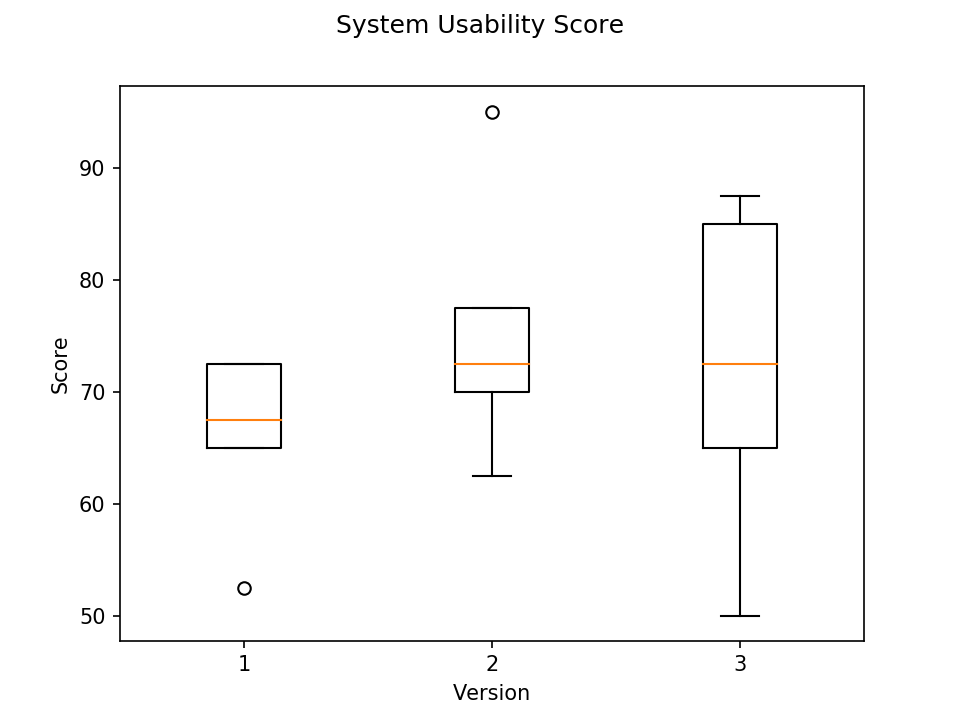

In [228]:
%matplotlib notebook
fig = plt.figure(dpi=150)
fig.suptitle('System Usability Score')
plt.xlabel('Version')
plt.ylabel('Score')
plt.boxplot([df_1['usability_score'][-5:],
           df_2['usability_score'][-5:],
           df_3['usability_score'][-5:]])
plt.show()
plt.savefig('System Usability Score')

<IPython.core.display.Javascript object>


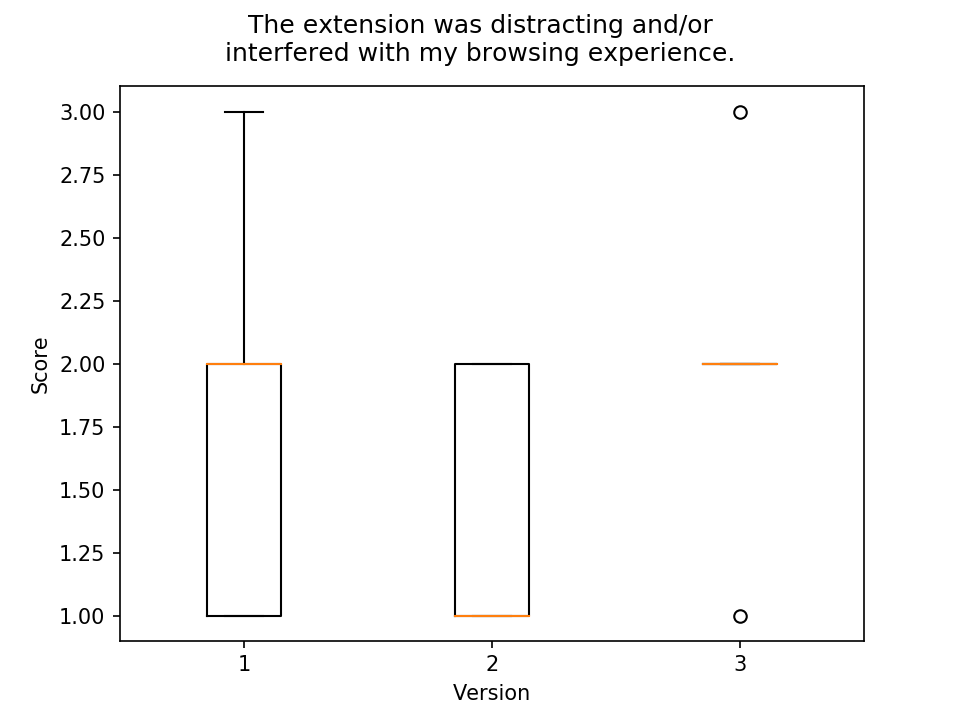

In [267]:
extra_usability_questions = ['The extension was distracting and/or interfered with my browsing experience.',
                            'I am likely to start ignoring the notifications of the extension after some time. ']

%matplotlib notebook
fig = plt.figure(dpi=150)
fig.suptitle("""The extension was distracting and/or
interfered with my browsing experience.""")
plt.xlabel('Version')
plt.ylabel('Score')
plt.boxplot([df_1[extra_usability_questions[0]][-5:],
           df_2[extra_usability_questions[0]][-5:],
           df_3[extra_usability_questions[0]][-5:]])
plt.show()
plt.savefig('Distracting')

<IPython.core.display.Javascript object>


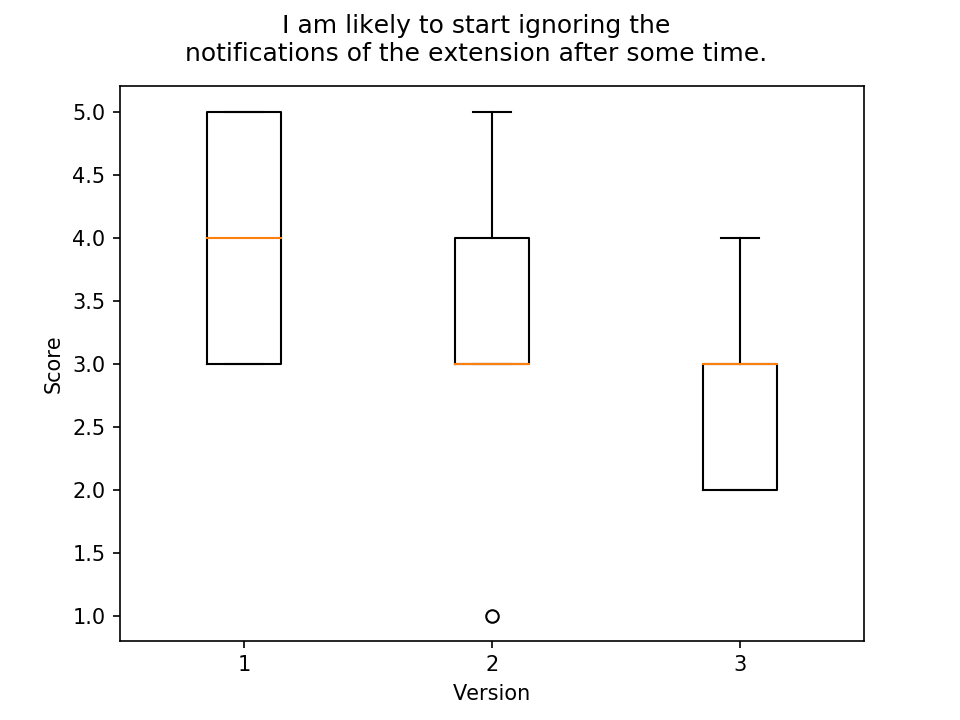

In [269]:
extra_usability_questions = ['The extension was distracting and/or interfered with my browsing experience.',
                            'I am likely to start ignoring the notifications of the extension after some time. ']

%matplotlib notebook
fig = plt.figure(dpi=150)
fig.suptitle("""I am likely to start ignoring the 
notifications of the extension after some time. """)
plt.xlabel('Version')
plt.ylabel('Score')
plt.boxplot([df_1[extra_usability_questions[1]][-5:],
           df_2[extra_usability_questions[1]][-5:],
           df_3[extra_usability_questions[1]][-5:]])
plt.show()
plt.savefig('Ignore Notifications')

# Security Condidence

In [316]:
def confidence_score(people):
    results = []
    for questions in people:
        results.append(questions.sum())
    return results

In [317]:
df_1['confidence_score'] = confidence_score(np.array(df_1[security_condidence_questions]).copy())
df_2['confidence_score'] = confidence_score(np.array(df_2[security_condidence_questions]).copy())
df_3['confidence_score'] = confidence_score(np.array(df_3[security_condidence_questions]).copy())

<IPython.core.display.Javascript object>


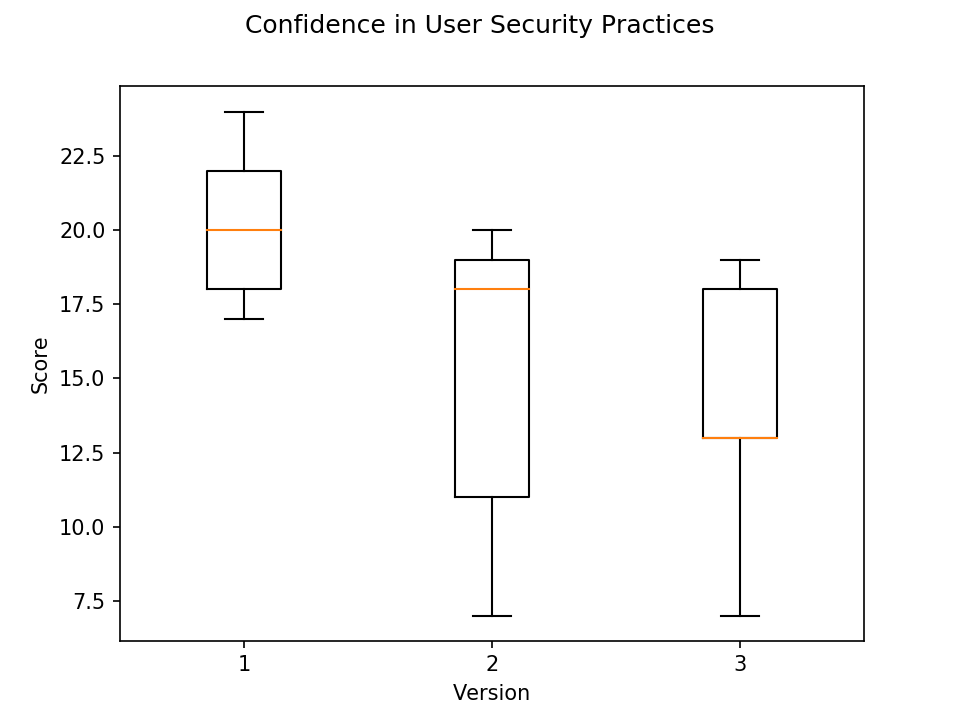

In [318]:
%matplotlib notebook
fig = plt.figure(dpi=150)
fig.suptitle('Confidence in User Security Practices')
plt.xlabel('Version')
plt.ylabel('Score')
plt.boxplot([df_1['confidence_score'][-5:],
           df_2['confidence_score'][-5:],
           df_3['confidence_score'][-5:]])
plt.show()
plt.savefig('Confidence in Security')

# Efficacy

In [238]:
def efficacy_score(people):
    results = []
    for questions in people:
        results.append(questions.sum())
    return results

In [240]:
df_1['efficacy_score'] = efficacy_score(np.array(df_1[efficacy_questions]).copy())
df_2['efficacy_score'] = efficacy_score(np.array(df_2[efficacy_questions]).copy())
df_3['efficacy_score'] = efficacy_score(np.array(df_3[efficacy_questions]).copy())

<IPython.core.display.Javascript object>


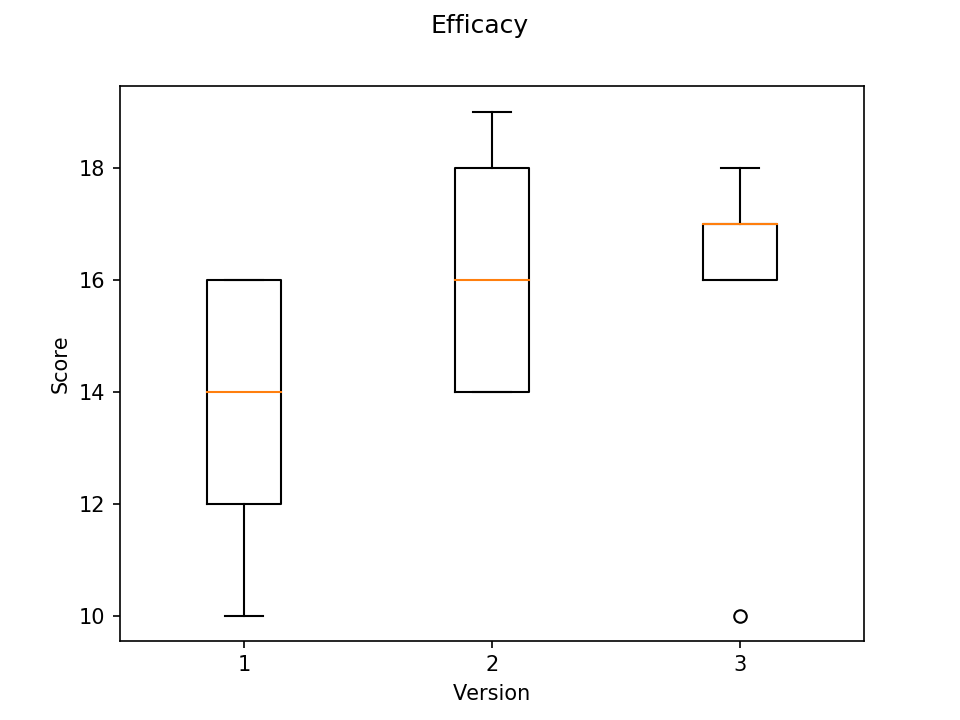

In [237]:
%matplotlib notebook
fig = plt.figure(dpi=150)
fig.suptitle('Efficacy')
plt.xlabel('Version')
plt.ylabel('Score')
plt.boxplot([df_1['efficacy_score'][-5:],
           df_2['efficacy_score'][-5:],
           df_3['efficacy_score'][-5:]])
plt.show()
plt.savefig('Efficacy')

In [163]:
df_1[efficacy_questions]

,I am more likely to update my reused passwords if I continue to use this extension.,I am more likely to update my weak passwords if I continue to use this extension.,"I am likely to be more conscious of the website links I click on, as they might be malicious, if I continue to use this extension.","I am likely to be more conscious of which websites I provide my credentials to, if I continue to use this extension.",The extension was distracting and/or interfered with my browsing experience.,I am likely to start ignoring the notifications of the extension after some time.
0,4,4,4,4,1,3
1,2,2,4,3,2,5
2,3,3,4,4,2,4
3,3,3,2,4,1,5
4,2,4,4,4,2,3
5,4,4,4,4,1,4
6,5,3,4,4,2,3
7,1,1,4,4,3,5
